# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from time import gmtime, strftime
import scipy.stats as st
import datetime
from scipy.stats import linregress
import hvplot.pandas


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
from api_keys_NoelleWatson import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Loop through all the cities in our list to fetch weather data

city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

      # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | elliot lake
Processing Record 4 of Set 1 | alta
Processing Record 5 of Set 1 | saldanha
Processing Record 6 of Set 1 | grand island
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | manacapuru
Processing Record 9 of Set 1 | al jubayl
Processing Record 10 of Set 1 | weno
Processing Record 11 of Set 1 | bam
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | maceio
Processing Record 16 of Set 1 | nishinoomote
Processing Record 17 of Set 1 | vilyuysk
Processing Record 18 of Set 1 | lionel town
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | susuman
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | port-aux-francais
Processing Record 23 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.6000,73.0833,27.80,74,35,5.43,MV,1696276344
1,whitehorse,60.7161,-135.0538,8.39,77,75,4.63,CA,1696276344
2,elliot lake,46.3834,-82.6331,24.06,54,92,4.14,CA,1696276345
3,alta,69.9689,23.2717,2.59,86,100,3.09,NO,1696276345
4,saldanha,-33.0117,17.9442,15.58,85,0,6.75,ZA,1696276345


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,27.80,74,35,5.43,MV,1696276344
1,whitehorse,60.7161,-135.0538,8.39,77,75,4.63,CA,1696276344
2,elliot lake,46.3834,-82.6331,24.06,54,92,4.14,CA,1696276345
3,alta,69.9689,23.2717,2.59,86,100,3.09,NO,1696276345
4,saldanha,-33.0117,17.9442,15.58,85,0,6.75,ZA,1696276345


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

2023-10-02


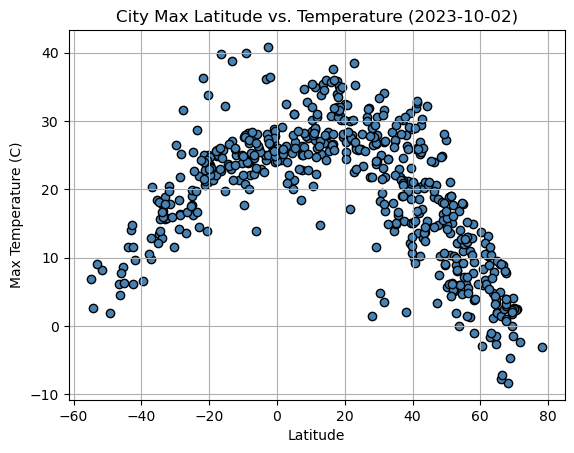

In [8]:
# Getting current date/time
current_date = strftime("%Y-%m-%d", gmtime())
print(current_date)
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', facecolor='steelblue', edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Max Latitude vs. Temperature ({current_date})')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

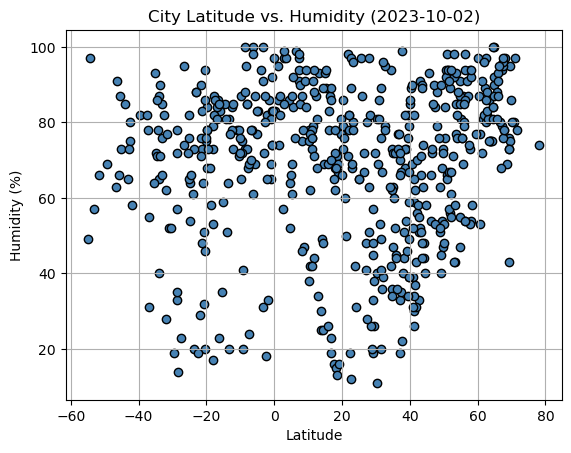

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', facecolor='steelblue', edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({current_date})')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

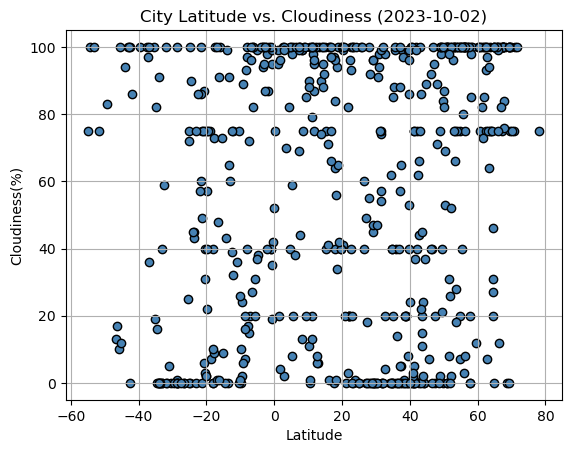

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', facecolor='steelblue', edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f'City Latitude vs. Cloudiness ({current_date})')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

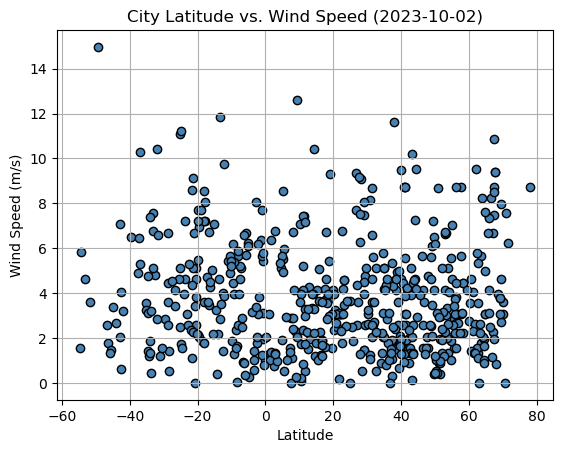

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', facecolor='steelblue', edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed ({current_date})')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:

def linear_regression_plot(x_values, y_values, y_label, coord): 
     # Perform linear regression
    correlation_coef = st.pearsonr(x_values, y_values)
    print(f"The r-value is: {correlation_coef[0]}") 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot the original data points
    plt.scatter(x_values,y_values, marker='o', facecolor='steelblue', edgecolors='black')
    # Plot the regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, coord, fontsize=15, color="red")
    # Add labels and a legend
    plt.xlabel('Latitiude')
    plt.ylabel(y_label)
    # Show the plot
    plt.show()
    


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0] 

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,whitehorse,60.7161,-135.0538,8.39,77,75,4.63,CA,1696276344
2,elliot lake,46.3834,-82.6331,24.06,54,92,4.14,CA,1696276345
3,alta,69.9689,23.2717,2.59,86,100,3.09,NO,1696276345
5,grand island,40.9250,-98.3420,31.97,39,0,8.75,US,1696276313
6,ribeira grande,38.5167,-28.7000,20.22,68,20,4.63,PT,1696276345


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0] 

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,27.80,74,35,5.43,MV,1696276344
4,saldanha,-33.0117,17.9442,15.58,85,0,6.75,ZA,1696276345
7,manacapuru,-3.2997,-60.6206,36.10,31,100,1.44,BR,1696276345
12,papatowai,-46.5619,169.4708,6.14,63,13,2.58,NZ,1696276347
13,east london,-33.0153,27.9116,18.81,76,0,7.55,ZA,1696276347


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7979979046117559


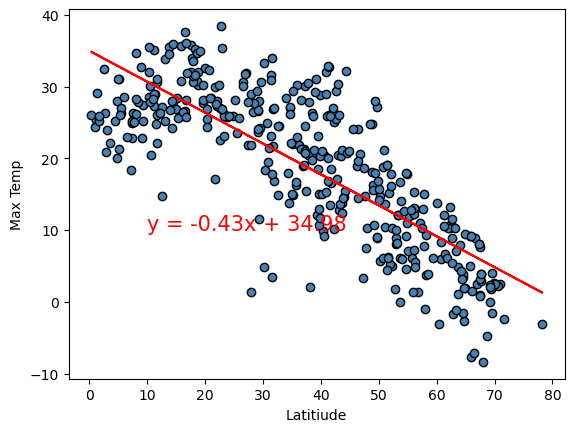

In [15]:
# Linear regression on Northern Hemisphere
from pyparsing import line_end

label_temp = "Max Temp"
lat_north = northern_hemi_df['Lat']
max_temp_north= northern_hemi_df['Max Temp']
coord = (10,10)

linear_regression_plot(lat_north, max_temp_north, label_temp, coord)



The r-value is: 0.7763981685095915


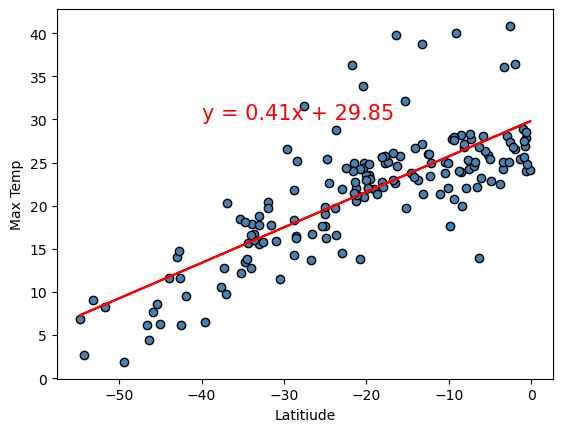

In [16]:
# Linear regression on Southern Hemisphere
coord = (-40,30)
label_temp = "Max Temp"
lat_south = southern_hemi_df['Lat']
max_temp_south= southern_hemi_df['Max Temp']

linear_regression_plot(lat_south, max_temp_south, label_temp, coord)

**Discussion about the linear relationship:** The linear relationship between max temperature and hempisphere seems to show that it is the warmest in the center of the two hemispheres. This makes sense as it is warmest near the equator and the north and south poles are both very cold. The r value is considered high when comparing the northern and southern hemispheres, proving max temperatures and latitude are highly correlated.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1565648404568069


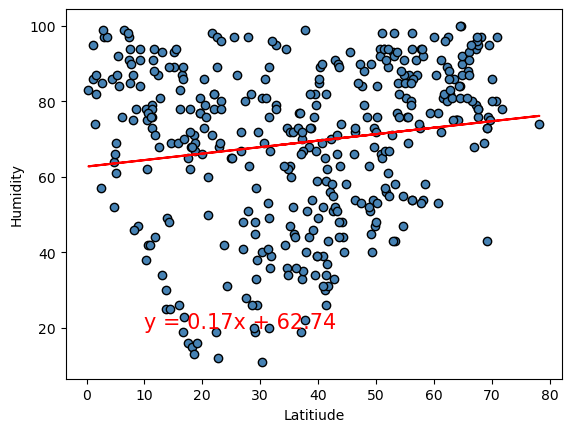

In [17]:
# Northern Hemisphere
coord = (10, 20)
label = "Humidity"
lat_north = northern_hemi_df['Lat']
humidity_north= northern_hemi_df['Humidity']

linear_regression_plot(lat_north, humidity_north, label, coord)

The r-value is: 0.1071172399135815


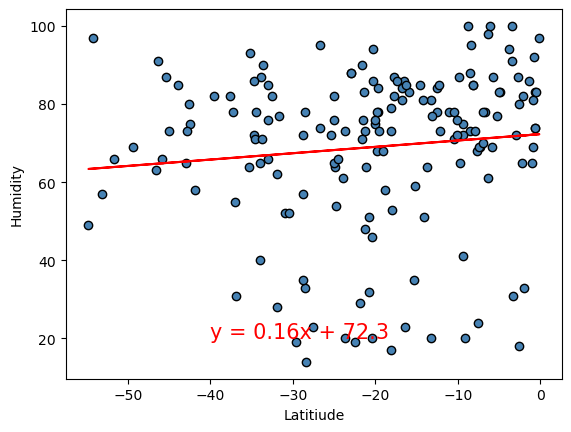

In [18]:
# Southern Hemisphere
coord = (-40,20)
label = "Humidity"
lat_south = southern_hemi_df['Lat']
humidity_south= southern_hemi_df['Humidity']

linear_regression_plot(lat_south, humidity_south, label, coord)

**Discussion about the linear relationship:** The correlation is weak when comparing latitude to humidity. It seems that it is generally the least humid at the southern pole and gets increasingly more humid as you get toward  the north pole. The r value is considered small, so there is very little correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07723420877568701


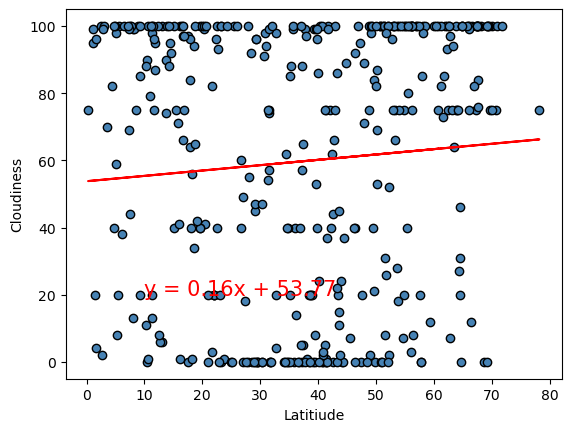

In [19]:
# Northern Hemisphere
coord = (10,20)
label = "Cloudiness"
lat_north = northern_hemi_df['Lat']
cloudiness_north= northern_hemi_df['Cloudiness']

linear_regression_plot(lat_north, cloudiness_north, label, coord)

The r-value is: 0.08638376609580055


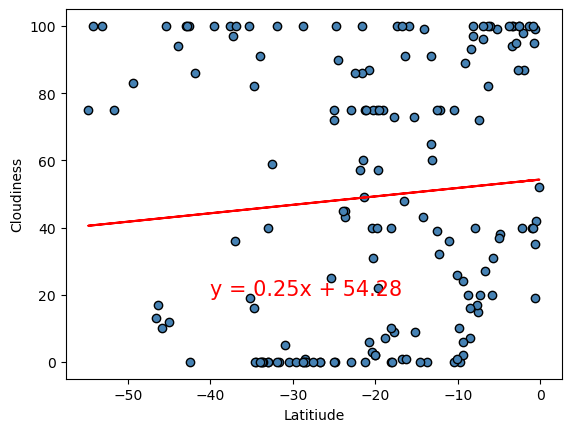

In [20]:
# Southern Hemisphere
coord = (-40,20)
label = "Cloudiness"
lat_south = southern_hemi_df['Lat']
cloudiness_south= southern_hemi_df['Cloudiness']

linear_regression_plot(lat_south, cloudiness_south, label, coord)

**Discussion about the linear relationship:** The linear relationship between cloudiness and latitude are similar to the correlation between humidity and latitude. It is less cloudy at the south pole and more cloudy near the north pole. Although the r value is a bit higher here than it when comparing latitude with humidity, it is still considered to be a weak correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10221641666123873


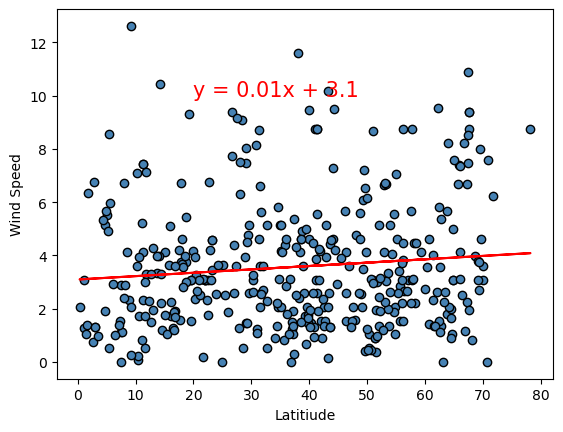

In [21]:
# Northern Hemisphere
coord = (20,10)
label = "Wind Speed"
lat_north = northern_hemi_df['Lat']
windspeed_north= northern_hemi_df['Wind Speed']

linear_regression_plot(lat_north, windspeed_north, label, coord)

The r-value is: -0.057101861309461016


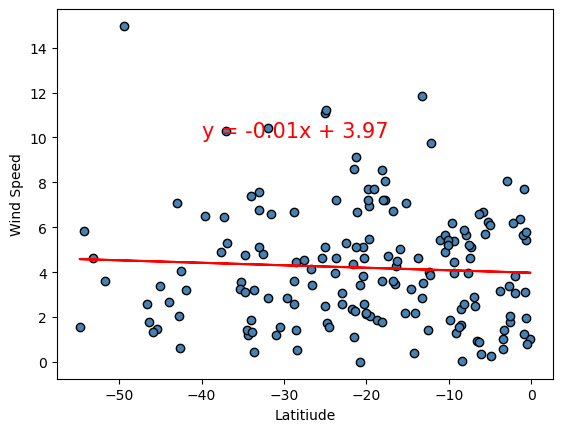

In [22]:
# Southern Hemisphere
coord = (-40,10)
label = "Wind Speed"
lat_south = southern_hemi_df['Lat']
windspeed_south= southern_hemi_df['Wind Speed']

linear_regression_plot(lat_south, windspeed_south, label, coord)

**Discussion about the linear relationship:** The correlation between windspeed and latitude is fairly how, but there there is a weak correlation showing that it tends to be windier near the poles and less windy toward the equator.